In [1]:
!jt -r

Reset css and font defaults in:
C:\Users\user\.jupyter\custom &
C:\Users\user\AppData\Roaming\jupyter\nbextensions


In [2]:
import os
import sys
import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(r'C:\Users\user\Dropbox\+Trading\AlgorithmicTrading\AlgoTrading_v3\core')
from utils import *

### Correlation analysis between Tickers (e.x. SPDR ETFs)

In [3]:
ETF_paths = get_list_of_files_in_a_folder(r'C:\Users\user\Dropbox\+Trading\AlgorithmicTrading\Data\Daily\US_Market\Indices')

In [4]:
ETF_dfs = []
ETF_names = []
for i, etf_path in enumerate(ETF_paths[:]):
    ETF_name = os.path.split(etf_path)[-1][:4].strip('_')
    ETF_names.append(ETF_name)
    ETF_dfs.append(pd.read_csv(etf_path))
    print(i, ETF_name, ':\t', len(ETF_dfs[i]), 'days')

0 NDX :	 5535 days
1 SPY :	 5535 days
2 XLB :	 5515 days
3 XLC :	 871 days
4 XLE :	 5515 days
5 XLF :	 5515 days
6 XLI :	 5515 days
7 XLK :	 5515 days
8 XLP :	 5515 days
9 XLRE :	 1549 days
10 XLU :	 5515 days
11 XLV :	 5515 days
12 ^GSP :	 445 days


In [5]:
merged_df = ETF_dfs[0][['Date','Close']]
for etf_df in ETF_dfs[1:]:
    merged_df = pd.merge(merged_df, etf_df[['Date','Close']], how='inner',on='Date')
    # suffixes=[ETF_names[0],ETF_names[1]]
merged_df.columns = ['Date'] + ETF_names
merged_df = merged_df.set_index('Date')

ETFs_pct_changes = merged_df.pct_change() * 100
ETFs_pct_changes = ETFs_pct_changes[['SPY', 'NDX','XLK', 'XLC', 'XLV', 'XLB', 'XLF', 'XLI', 'XLP', 'XLE', 'XLU', 'XLRE']]
ETFs_pct_changes.head(3)

,SPY,NDX,XLK,XLC,XLV,XLB,XLF,XLI,XLP,XLE,XLU,XLRE
Date,,,,,,,,,,,,
2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-01,3.870265,5.122586,5.771388,1.118941,7.498601,-1.031801,-0.930233,4.230363,1.449549,0.973041,0.038132,-2.735196
2018-11-01,-6.245501,-7.537558,-7.372178,-5.102455,-6.065680,-7.554261,-4.658725,-10.089766,2.802008,-11.798408,1.867733,-0.463540


In [6]:
corr_vals = np.round(ETFs_pct_changes.corr() * 100, 0).astype(int)
corr_vals

,SPY,NDX,XLK,XLC,XLV,XLB,XLF,XLI,XLP,XLE,XLU,XLRE
SPY,100,88,88,93,86,94,88,93,80,77,68,78
NDX,88,100,98,84,80,74,61,71,65,50,43,53
XLK,88,98,100,82,76,73,60,71,66,50,43,51
XLC,93,84,82,100,77,87,85,86,74,72,56,69
XLV,86,80,76,77,100,77,66,73,60,59,60,68
XLB,94,74,73,87,77,100,92,94,82,78,70,81
XLF,88,61,60,85,66,92,100,93,71,89,65,77
XLI,93,71,71,86,73,94,93,100,78,79,69,76
XLP,80,65,66,74,60,82,71,78,100,49,78,73
XLE,77,50,50,72,59,78,89,79,49,100,47,64


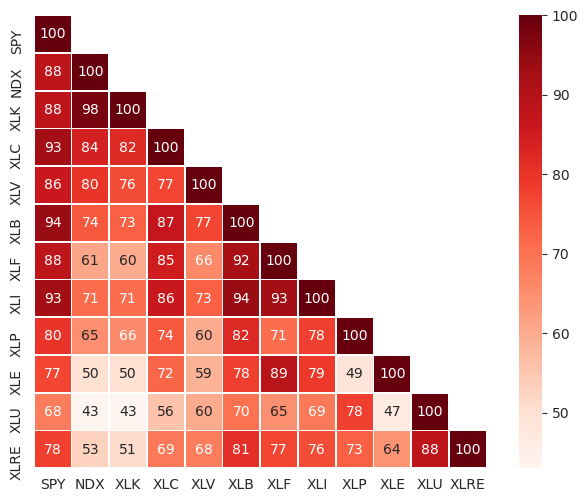

In [7]:
import seaborn as sns
corr = corr_vals #[['NDX', 'SPY', 'XLK', 'XLC', 'XLV', 'XLB', 'XLI', 'XLP', 'XLE', 'XLU', 'XLF']]
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7*1.2, 5*1.2), dpi=100)
    ax = sns.heatmap(corr, mask=mask, annot=True, square=True, linewidths=.5, cmap="Reds", fmt='d')
    
# f.savefig("SPDR ETFs Correlation.jpg", bbox_inches='tight', dpi=200)

In [8]:
get_top_correlations_v2(corr_vals)

,feature 1,feature 2,Correlation
0,NDX,XLK,98
1,SPY,XLB,94
2,XLB,XLI,94
3,SPY,XLC,93
4,XLF,XLI,93
...,...,...,...
61,XLK,XLE,50
62,XLP,XLE,49
63,XLE,XLU,47
64,NDX,XLU,43


### CanadianStock_Dec2021_top100

In [9]:
data = pd.read_excel(r"C:\Users\user\Dropbox\+Trading\AlgorithmicTrading\Data\+Stocks_lists\CanadianStock_Dec2021_top100.xlsx")
data = data.dropna(how='all').reset_index(drop=True)
data.shape
data.tail(5)

,Ticker,Company,MKT Cap,Last,CHG%,CHG,Technical Rating,Vol,Volume Price,P/E,EPS,Employees,Sector
96,BEPC,BROOKFIELD RENEWABLE CORP,7.933BCAD,46.21CAD,−0.06%,−0.03CAD,Sell,186.197K,8.604M,NaN,−5.51CAD,NaN,Utilities
97,STN,STANTEC INC,7.826BCAD,71.45CAD,0.0151,1.06CAD,Strong Buy,179.165K,12.801M,39.16,1.81CAD,22K,Industrial Services
98,IAG,IA FINANCIAL CORPORATION,7.645BCAD,71.26CAD,0.0034,0.24CAD,Neutral,76.445K,5.447M,9.63,7.39CAD,NaN,Finance
99,GLXY,GALAXY DIGITAL HLDGS LTD,7.565BCAD,25.00CAD,0.0785,1.82CAD,Sell,553.95K,13.849M,5.07,5.35CAD,NaN,Finance
100,AC,Air Canada,7.674BCAD,21.34CAD,−0.51%,−0.11CAD,Sell,2.581M,55.081M,NaN,−12.86CAD,NaN,Transportation


In [10]:
# data['Tickers'] = data.apply(lambda x: x['Company'].split('D')[0], axis=1)
# data['Company'] = data.apply(lambda x: x['Company'].split('D')[1], axis=1)
# data.head(5)

### SPX return in 5 years

In [11]:
from tools import *

In [12]:
# download_stock_price_data_wrapper(['^GSPC'], 
#                                   '1970-01-01', '2021-12-31', '2021-12-31', '2022-01-01', interval='1mo',
#                                  save_folder='../Data/Daily/US_Market/Indices')

In [167]:
data = pd.read_csv("../Data/Daily/US_Market/Indices/^GSPC_USD_19700101_to_20211231_Monthly_yahoo_finance.csv",parse_dates=['Date'])
data = data[['Date','Close', 'Adj Close', 'Volume']]#.set_index('Date').round(2)#.head(3)
data['Date'] = data['Date'].dt.to_period('M') 
data.head(3)

,Date,Close,Adj Close,Volume
0,1985-01,179.630005,179.630005,2673710000
1,1985-02,181.179993,181.179993,2194620000
2,1985-03,180.660004,180.660004,2153090000


In [168]:
n_years = 1
data[f'% Change_in_{n_years}_years'] = (data['Adj Close'].pct_change(n_years * 12) * 100).round(2)

data = data.dropna()
data

,Date,Close,Adj Close,Volume,% Change_in_1_years
12,1986-01,211.779999,211.779999,2879010000,17.90
13,1986-02,226.919998,226.919998,2899100000,25.25
14,1986-03,238.899994,238.899994,3214600000,32.24
15,1986-04,235.520004,235.520004,3240400000,30.97
16,1986-05,247.350006,247.350006,2680240000,30.49
...,...,...,...,...,...
440,2021-09,4307.540039,4307.540039,66268850000,28.09
441,2021-10,4605.379883,4605.379883,61874700000,40.84
442,2021-11,4567.000000,4567.000000,67520800000,26.10
443,2021-12,4766.180176,4766.180176,68699830000,26.89


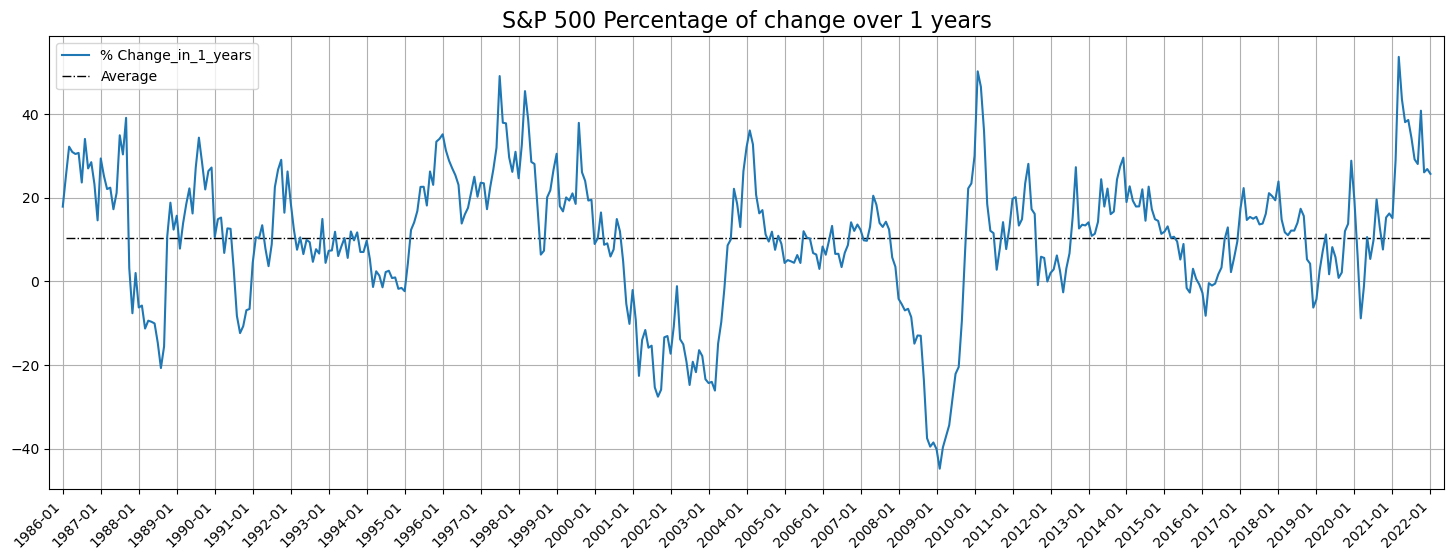

In [169]:
## import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(18, 6), dpi=100)
# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0.01, 0.05)

data[f'% Change_in_{n_years}_years'].plot(kind='line', ax=ax) # mdates.MonthLocator()
ax.grid(which='major', axis='both')
# ax.xaxis.set_major_locator(plt.MaxNLocator(30))
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

avg = data[f'% Change_in_{n_years}_years'].mean()
ax.hlines(y=avg, xmin=data.index[1], xmax=data.index[-1], linewidth=1, color='k', ls='-.', label='Average')
# plt.hlines(y=39.5, xmin=100, xmax=175, colors='aqua', linestyles='-', lw=2, label='Single Short Line')

ax.set_xticks(data.index[::12])
# ax.set_xticklabels(np.arange(0, len(data), 24))
ax.legend()
ax.set_xticklabels(data['Date'][::12], rotation = 45, ha="right")
ax.set_title(f"S&P 500 Percentage of change over {n_years} years", fontsize=16)
plt.savefig(f"SP_500_change_over_{n_years}_years.jpg", dpi=200, bbox_inches='tight', pad_inches=0.2)